## SCRAPING SITO DEL CENTRO RICERCA IN DATA SCIENCE UNIFI

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://datascience.unifi.it/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Florence data science – Center od Data Science – University of Florence


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['https://datascience.unifi.it/index.php/2020/04/07/special-issue/',
 'https://datascience.unifi.it/index.php/members/',
 'https://datascience.unifi.it/index.php/2020/09/03/cen-ibs-gmds-invited-session-on-causal-inference-and-machine-learning/',
 'https://datascience.unifi.it/index.php/news/',
 'https://datascience.unifi.it/index.php/fellows/',
 'https://datascience.unifi.it/index.php/category/covid/',
 'https://datascience.unifi.it/index.php/category/jobresearchvisiting-opportunities/',
 'https://datascience.unifi.it/index.php/associate-research-units/',
 'http://datascience.unifi.it/index.php/steering-group/',
 'http://datascience.unifi.it/#about',
 'mailto:datascience@unifi.it',
 'https://www.disei.unifi.it/',
 'http://datascience.unifi.it/',
 'http://datascience.unifi.it/#contact',
 'https://datascience.unifi.it/index.php/2020/06/06/data-science-for-impact-evaluation-webinar/',
 '#content',
 'https://datascience.unifi.it/index.php/projects/',
 'https://www.disia.unifi.it/',
 'https

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('http://datascience.unifi.it/'), res))
lista_url2=list(set(lista_url2))
lista_url2

['http://datascience.unifi.it/',
 'http://datascience.unifi.it/index.php/events/',
 'http://datascience.unifi.it/#contact',
 'http://datascience.unifi.it/#services',
 'http://datascience.unifi.it/index.php/steering-group/',
 'http://datascience.unifi.it/#about']

In [5]:
indices=[0,1,5]
lista_url2 = [lista_url2[i] for i in indices]
lista_url2

['http://datascience.unifi.it/',
 'http://datascience.unifi.it/index.php/events/',
 'http://datascience.unifi.it/#about']

In [6]:
lista_url3 = list(filter(lambda x: x.startswith('https://datascience.unifi.it/'), res))
lista_url3 =list(set(lista_url3))
lista_url3

['https://datascience.unifi.it/index.php/2020/04/07/special-issue/',
 'https://datascience.unifi.it/index.php/members/',
 'https://datascience.unifi.it/index.php/2020/09/03/cen-ibs-gmds-invited-session-on-causal-inference-and-machine-learning/',
 'https://datascience.unifi.it/index.php/news/',
 'https://datascience.unifi.it/index.php/fellows/',
 'https://datascience.unifi.it/index.php/category/covid/',
 'https://datascience.unifi.it/index.php/category/jobresearchvisiting-opportunities/',
 'https://datascience.unifi.it/index.php/associate-research-units/',
 'https://datascience.unifi.it/index.php/2020/06/06/data-science-for-impact-evaluation-webinar/',
 'https://datascience.unifi.it/index.php/projects/',
 'https://datascience.unifi.it/index.php/2020/06/18/phd-programme-in-statistics-and-data-science-cycle-xxxvi-at-the-university-of-florence/',
 'https://datascience.unifi.it/index.php/2020/05/15/assistant-professor-position-with-tenure-track-imt-school-for-advanced-studies/',
 'https://d

In [7]:
indices=[3,5,8,9,12,13,14,16,17,19]
lista_url3 = [lista_url3[i] for i in indices]
lista_url3

['https://datascience.unifi.it/index.php/news/',
 'https://datascience.unifi.it/index.php/category/covid/',
 'https://datascience.unifi.it/index.php/2020/06/06/data-science-for-impact-evaluation-webinar/',
 'https://datascience.unifi.it/index.php/projects/',
 'https://datascience.unifi.it/index.php/category/education/',
 'https://datascience.unifi.it/index.php/2020/12/04/2nd-level-master-in-data-science-and-statistical-learning-md2sl/',
 'https://datascience.unifi.it/index.php/category/markup/',
 'https://datascience.unifi.it/index.php/consulting/',
 'https://datascience.unifi.it/index.php/education/',
 'https://datascience.unifi.it/index.php/category/event/']

In [8]:
lista_url4= lista_url2 + lista_url3
lista_url4=list(set(lista_url4))
lista_url4

['http://datascience.unifi.it/',
 'http://datascience.unifi.it/index.php/events/',
 'https://datascience.unifi.it/index.php/news/',
 'https://datascience.unifi.it/index.php/2020/12/04/2nd-level-master-in-data-science-and-statistical-learning-md2sl/',
 'https://datascience.unifi.it/index.php/category/markup/',
 'https://datascience.unifi.it/index.php/category/covid/',
 'https://datascience.unifi.it/index.php/2020/06/06/data-science-for-impact-evaluation-webinar/',
 'https://datascience.unifi.it/index.php/consulting/',
 'https://datascience.unifi.it/index.php/category/education/',
 'https://datascience.unifi.it/index.php/education/',
 'https://datascience.unifi.it/index.php/projects/',
 'https://datascience.unifi.it/index.php/category/event/',
 'http://datascience.unifi.it/#about']

In [9]:
texts = []
title= []
for url in lista_url4[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Florence data science – Center od Data Science – University of Florence',
 'Upcoming Events – Florence data science',
 'News – Florence data science',
 '2nd Level Master in Data Science and Statistical Learning (MD2SL) – Florence data science',
 'Markup – Florence data science',
 'covid – Florence data science',
 'Data Science for Impact Evaluation Webinar – Florence data science',
 'Consulting – Florence data science',
 'education – Florence data science',
 'Education – Florence data science',
 'Projects – Florence data science',
 'Event – Florence data science',
 'Florence data science – Center od Data Science – University of Florence']

In [11]:
print(texts[0])






Involved Departments 




  
DISIA
Statistics, Computer Science, Applications “G. Parenti”




  
DIMAI
Mathematics and Computer Science “Ulisse Dini”




  
DINFO
Information Engineering




  
DISEI
Economics and Management









Who we are About Us Data science lies at the intersection of statistical, mathematical and computer sciences and has grown with domain and application-specific expertise. The challenge is now how to govern intrinsic complexities and intelligence in data science and big data problems, how to fill the gaps in and opportunities for data science research by bridging scientific and intellectual domains.
The Florence Center for Data Science is a joint effort of four Departments of the University of Florence, representing a rare, if not unique, balancing of statistical, mathematical, computer sciences, computer engineering and application-specific expertise. It has been envisaged with the goal of interconnecting and aggregating academic disciplines involved

### TEXT CLEANING

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

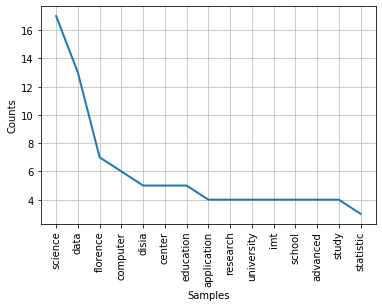

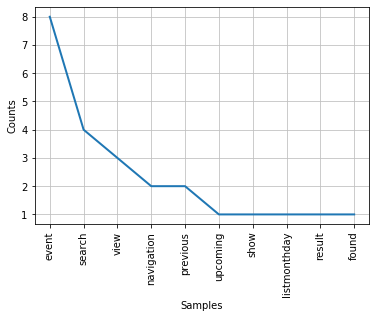

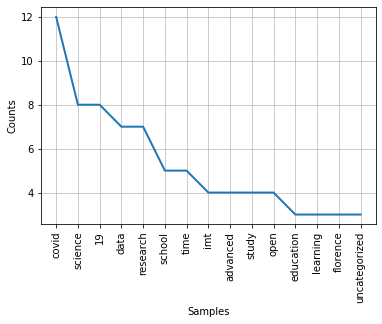

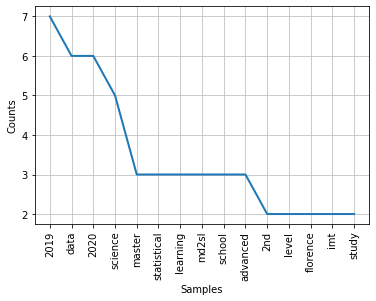

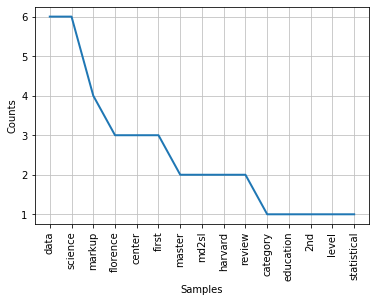

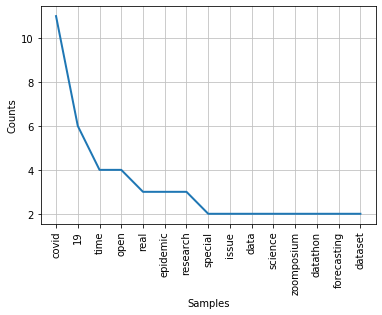

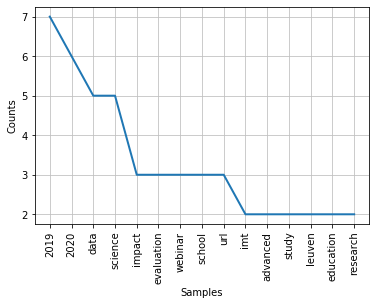

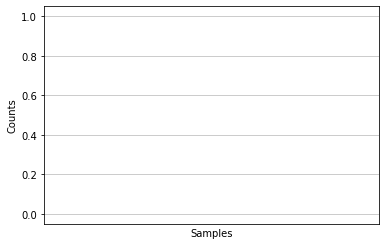

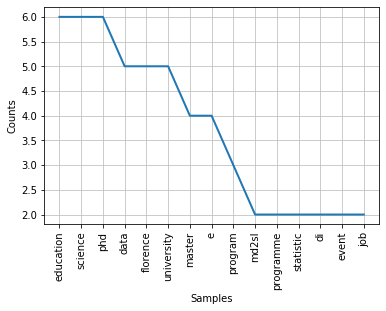

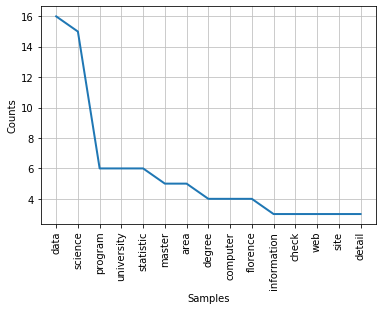

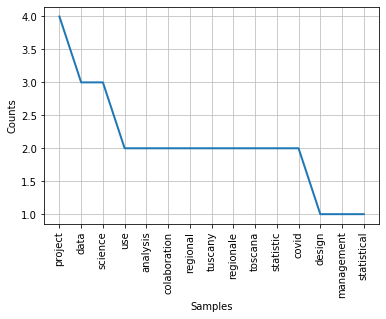

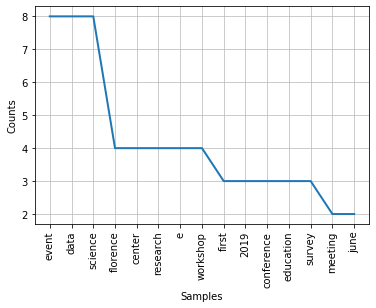

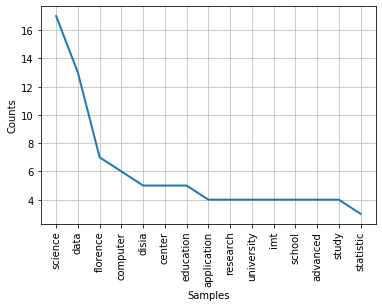

In [14]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

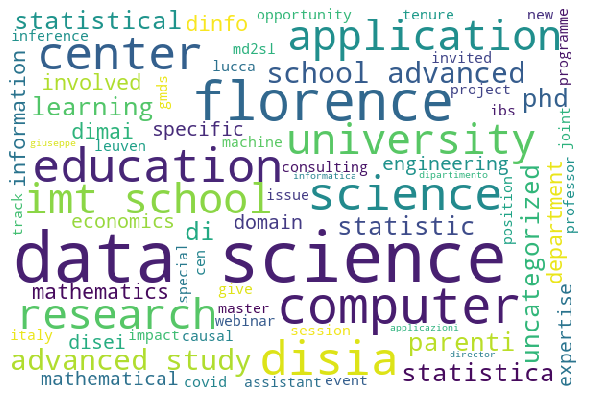

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

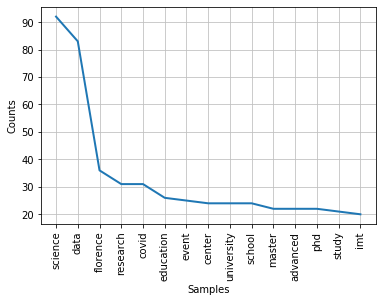

In [16]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

In [ ]:
type(tot_text)

In [17]:
from collections import Counter 
  
# split() returns list of all the words in the string 
split_it = tot_text.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(15) 
  
print(most_occur) 

[('science', 92), ('data', 83), ('florence', 36), ('research', 31), ('covid', 31), ('education', 26), ('event', 25), ('center', 24), ('university', 24), ('school', 24), ('master', 22), ('advanced', 22), ('phd', 22), ('study', 21), ('imt', 20)]


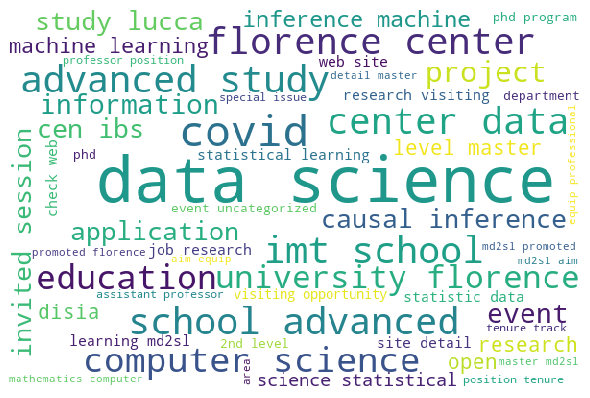

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## mutual information fra parola e centro di ricerca

In [19]:
from nltk import bigrams
import collections
import math
from math import log

#formula: PMI-IR (w1, w2) = log2 p(w1&w2)/p(w1)*p(w2); p=probability, w=word 

In [20]:
a1=tot_text.split()    
a2=collections.Counter(a1)
#a2= a2.most_common(15) 
a3=collections.Counter(bigrams(a2))
a4=sum([a2[x]for x in a2])
a5=sum([a3[x]for x in a3])
a6={x:float(a2[x])/a4 for x in a2} # word probabilities(w1 and w2)
a7={x:float(a3[x])/a5 for x in a3} # joint probabilites (w1&w2)
u = []
for x in a6:
    k={x:round(log(a7[b]/(a6[x] * a6[y]),2),4) for b in a7 for y in a6 if x and y in b}
    u.append(k)
    
u

[{'involved': 11.551},
 {'department': 10.136},
 {'disia': 9.4355},
 {'statistic': 8.888},
 {'computer': 8.888},
 {'science': 6.6124},
 {'application': 9.3286},
 {'g': 11.136},
 {'parenti': 10.136},
 {'dimai': 11.136},
 {'mathematics': 10.3286},
 {'ulisse': 12.136},
 {'dini': 12.136},
 {'dinfo': 11.136},
 {'information': 9.6765},
 {'engineering': 10.814},
 {'disei': 11.136},
 {'economics': 10.3286},
 {'management': 11.136},
 {'u': 12.136},
 {'data': 6.7609},
 {'lie': 12.136},
 {'intersection': 12.136},
 {'statistical': 8.966},
 {'mathematical': 11.136},
 {'grown': 12.136},
 {'domain': 11.136},
 {'specific': 10.551},
 {'expertise': 11.136},
 {'challenge': 11.136},
 {'govern': 12.136},
 {'intrinsic': 12.136},
 {'complexity': 12.136},
 {'intelligence': 11.551},
 {'big': 12.136},
 {'problem': 12.136},
 {'fill': 12.136},
 {'gap': 12.136},
 {'opportunity': 9.6765},
 {'research': 8.1818},
 {'bridging': 12.136},
 {'scientific': 10.814},
 {'intellectual': 12.136},
 {'florence': 7.966},
 {'cente

In [21]:
values = [list(d.values())[0] for d in u]
values.sort()

Lista2 = []
for x in values:
    for d in u:
        val = list(d.values())[0]

        if x == val:
            Lista2.append({list(d.keys())[0]: x})
Lista2

[{'science': 6.6124},
 {'data': 6.7609},
 {'florence': 7.966},
 {'research': 8.1818},
 {'covid': 8.1818},
 {'research': 8.1818},
 {'covid': 8.1818},
 {'education': 8.4355},
 {'event': 8.4921},
 {'center': 8.551},
 {'university': 8.551},
 {'school': 8.551},
 {'center': 8.551},
 {'university': 8.551},
 {'school': 8.551},
 {'center': 8.551},
 {'university': 8.551},
 {'school': 8.551},
 {'master': 8.6765},
 {'advanced': 8.6765},
 {'phd': 8.6765},
 {'master': 8.6765},
 {'advanced': 8.6765},
 {'phd': 8.6765},
 {'master': 8.6765},
 {'advanced': 8.6765},
 {'phd': 8.6765},
 {'study': 8.7436},
 {'imt': 8.814},
 {'statistic': 8.888},
 {'computer': 8.888},
 {'learning': 8.888},
 {'statistic': 8.888},
 {'computer': 8.888},
 {'learning': 8.888},
 {'statistic': 8.888},
 {'computer': 8.888},
 {'learning': 8.888},
 {'statistical': 8.966},
 {'2019': 8.966},
 {'statistical': 8.966},
 {'2019': 8.966},
 {'md2sl': 9.136},
 {'2020': 9.136},
 {'19': 9.136},
 {'md2sl': 9.136},
 {'2020': 9.136},
 {'19': 9.136},